# DPPN: Deep Progression Predictor in NMIBC
### Sub-title: A procedure of training and test of prediction model for non-muscle-invasive bladder cancer (NMIBC) progression
#### Description: The following script describes a procedure to develop a predictive model for accurately predicting disease progression in NMIBC using transcriptomic data from NMIBC patients.

### Step 1. Loading packages
>#### Please load all the necessary packages for the training process. Execute the code below by pressing CTRL + Enter. If any of the packages are not installed, use the 'conda install' or 'pip install' command to install them.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

### Step 2. Loading transcriptome data
>#### 1) Please load the transcriptome data for training the predictive model and measuring performance.
>#### 2) In this example, data from the CBNUH cohort (n=103) is used for training, and data from the UROMOL cohort (n=476) is used for performance measurement. We have 1,789 prognostic genes extracted from the training data, and we extracted the expression data of 1,205 genes from the performance measurement data.
>#### 3) The data from the CBNU cohort was divided into a train set and a validation set in a 7:3 ratio to be utilized as validation data in the training process of the deep learning model.
>#### Execute the code below by pressing CTRL + Enter.

In [2]:
# Data loading
data = np.genfromtxt("gex.q_norm.g1789.overlapped_g1205.T.txt")

x_cbnu = data[0:103,0:1205]
y_cbnu = data[0:103,1205]

x_uromol = data[103:,0:1205]
y_uromol = data[103:,1205]

# Spliting TRINING, VALIDATION sets of data from the CBNU cohort
x_train, x_val, y_train, y_val = train_test_split(x_cbnu, y_cbnu, test_size=0.3)

print("#n of samples in train set:",len(y_train))
print("#n of samples in validation set:", len(y_val))

#n of samples in train set: 72
#n of samples in validation set: 31


### Step 3. Development of a prediction model accounting for gene expression data
>#### Construct a deep learning prediction model with 9 hidden layers using the relu activation function, and add 1 layer with the sigmoid activation function as the final layer to predict the results. The architecture of the model, including the number of layers and nodes, can be customized based on the data type and user's preferences.
>#### Execute the code below by pressing CTRL + Enter.

In [3]:
# Model construction
model = Sequential()
model.add(Dense(1500, input_dim=1205, activation='relu'))
model.add(Dense(1200, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Setting up the model training process.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              1809000   
                                                                 
 dense_1 (Dense)             (None, 1200)              1801200   
                                                                 
 dense_2 (Dense)             (None, 1000)              1201000   
                                                                 
 dense_3 (Dense)             (None, 800)               800800    
                                                                 
 dense_4 (Dense)             (None, 600)               480600    
                                                                 
 dense_5 (Dense)             (None, 300)               180300    
                                                                 
 dense_6 (Dense)             (None, 100)               3

### Step 4. Training model
>#### The predictive model is trained using a train set and a validation set. During each training step, the model's performance is evaluated on the validation set, and the optimal values are incorporated into the model. The current settings are batch_size=5 and epoch=300, and users can adjust the parameters based on their training pattern. If there is no improvement in performance over 50 epochs, stop the training process.
>#### Execute the code below by pressing CTRL + Enter.

In [4]:
# Training of model
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=50)
hist = model.fit(x_train, y_train, epochs=300, batch_size=5, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/300
15/15 [==============================] - 1s 31ms/step - loss: 0.6251 - accuracy: 0.6667 - val_loss: 0.1051 - val_accuracy: 0.9355
Epoch 2/300
15/15 [==============================] - 0s 23ms/step - loss: 0.0590 - accuracy: 0.9861 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 3/300
15/15 [==============================] - 0s 24ms/step - loss: 1.2911e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 4/300
15/15 [==============================] - 0s 23ms/step - loss: 6.3741e-05 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/300
15/15 [==============================] - 0s 23ms/step - loss: 3.9279e-05 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/300
15/15 [==============================] - 0s 23ms/step - loss: 2.5344e-05 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/300
15/15 [==============================] - 0s 24ms/step - loss: 1.6825e-05 - accuracy: 1.0000 - val_loss: 0.0030 - val_acc

### Step 5. Plotting the progress during training
>#### Generate and display the performance graph of the training process. Execute the code below by pressing CTRL + Enter.

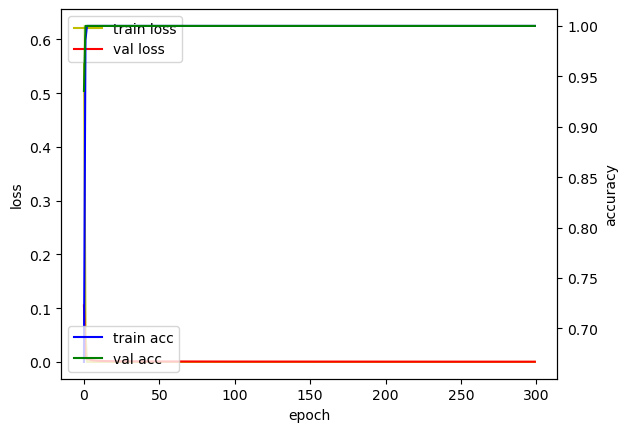

In [5]:
# Plotting the progress during training
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### Step 6. Save & load predictive model and diplay prediction results in the test set
>#### Save the trained model as 'DPPN_predictor.hdf5' once the training is completed. Additionally, load the trained predictor model, apply it to the test set, and obtain the prediction results.
>#### Execute the code below by pressing CTRL + Enter.

In [7]:
# Prediction model handling
from keras.models import load_model
predictor_filename = "DPPN_predictor.hdf5"
prediction_result_filename = "Classification_results.UROMOL.txt"

# Save prediction model
model.save(predictor_filename)

# load prediction model
model = load_model(predictor_filename)

# execute prediction model
y_predProp = model.predict(x_uromol)
y_predicted = np.where(y_predProp > 0.5, 1, 0)

for i in range(0, len(y_predicted)):
    if (int(y_predicted[i][0]) == 0):
        print("Prediction result of Patient", (i+1), ":", "low-risk-cluster (LRC)")
    else:
        print("Prediction result of Patient", (i+1), ":", "high-risk-cluster (HRC)")

# Save prediction results
fHnd = open(prediction_result_filename,"w")
for i in range(0, len(y_predicted)):
    if (int(y_predicted[i][0]) == 0):
        fHnd.write("Patient" + str(i+1) + "\t" + "low-risk-cluster (LRC)\n")
    else:
        fHnd.write("Patient" + str(i+1) + "\t" + "high-risk-cluster (HRC)\n")
fHnd.close()

15/15 [==============================] - 0s 6ms/step
Prediction result of Patient 1 : low-risk-cluster (LRC)
Prediction result of Patient 2 : low-risk-cluster (LRC)
Prediction result of Patient 3 : high-risk-cluster (HRC)
Prediction result of Patient 4 : low-risk-cluster (LRC)
Prediction result of Patient 5 : high-risk-cluster (HRC)
Prediction result of Patient 6 : low-risk-cluster (LRC)
Prediction result of Patient 7 : high-risk-cluster (HRC)
Prediction result of Patient 8 : high-risk-cluster (HRC)
Prediction result of Patient 9 : low-risk-cluster (LRC)
Prediction result of Patient 10 : high-risk-cluster (HRC)
Prediction result of Patient 11 : high-risk-cluster (HRC)
Prediction result of Patient 12 : high-risk-cluster (HRC)
Prediction result of Patient 13 : low-risk-cluster (LRC)
Prediction result of Patient 14 : low-risk-cluster (LRC)
Prediction result of Patient 15 : low-risk-cluster (LRC)
Prediction result of Patient 16 : low-risk-cluster (LRC)
Prediction result of Patient 17 : low

### Step 7. Performance estimation of predictive model using log-rank test
>#### The predictive model's ability to predict progression-free survival was evaluated using predicted outcomes on the test set. The evaluation was conducted using the log-rank test method.

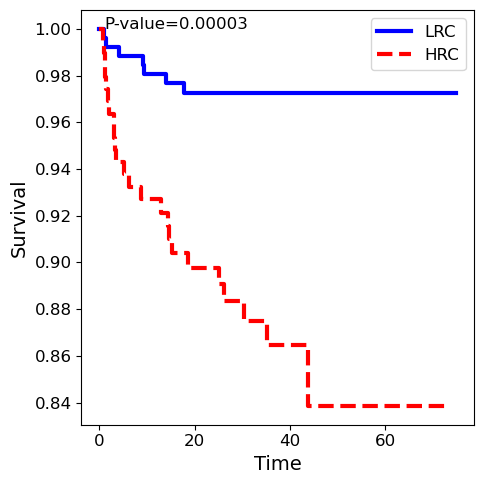

In [8]:
# Performance estimation of predictive model using log-rank test
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
pfs_data_filename = "PFS_data.TEST_SET.txt"

pfs_data = np.genfromtxt(pfs_data_filename)
pfs_m = pfs_data[0,1:]
pfs = pfs_data[1,1:]

labels = ['LRC', 'HRC']
groups = []
for risk_group in y_predicted:
    groups.append(int(risk_group[0])+1)
events = pfs
times  = pfs_m

# data transform into numpy array
E = np.array(events, dtype=np.int32)
T = np.array(times, dtype=np.float32)

# Set up matplotlib
rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(5,5))
styles = ['-', '--']
colors = ['b', 'r']
lw = 3

# Draw Kaplan-Meier plot
kmf = KaplanMeierFitter()
for i, label in enumerate(labels):
    ix = np.array(groups) == (i+1)
    kmf.fit(T[ix], event_observed=E[ix], label=labels[i])
    kmf.plot(ax=ax, ci_show=False, linewidth=lw, style=styles[i], c=colors[i])

# Perform log-rank test
ix = np.array(groups) == 2
result = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=.99)
pvalue = result.p_value
ax.text(1, 1,'P-value=%.5f'% pvalue)

# Set up Legends
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Survival', fontsize=14)
ax.legend(loc='upper right')

# Print Kaplan-Meier plot
plt.tight_layout()
plt.show()